In [1]:
import matplotlib.pyplot as plt
import numpy as np

In an RL circuit, where an inductor $ L $ is already carrying a current $ I_0 $ and a voltage source $ V_s $ is switched in at $ t = 0 $, the current through the inductor $ i(t) $ as a function of time can be described using the following differential equation:

$$ V_s = L \frac{di(t)}{dt} + Ri(t) $$

where:
- $ V_s $ is the constant voltage source applied at $ t = 0 $.
- $ R $ is the resistance in the circuit.
- $ L $ is the inductance of the inductor.
- $ i(t) $ is the current through the inductor at time $ t $.

To solve this differential equation, we need to find the particular and homogeneous solutions and then apply the initial condition.

The homogeneous equation is:

$$ 0 = L \frac{di_h(t)}{dt} + Ri_h(t) $$

which has the solution:

$$ i_h(t) = Ae^{-\frac{R}{L}t} $$

where $ A $ is a constant to be determined from initial conditions.

The particular solution $ i_p(t) $ for a constant $ V_s $ is a steady-state current where the derivative term drops out:

$$ V_s = Ri_p(t) $$
$$ i_p(t) = \frac{V_s}{R} $$

The total solution is the sum of the homogeneous and particular solutions:

$$ i(t) = i_h(t) + i_p(t) $$
$$ i(t) = Ae^{-\frac{R}{L}t} + \frac{V_s}{R} $$

To find the constant $ A $, we use the initial condition $ i(0) = I_0 $:

$$ I_0 = A + \frac{V_s}{R} $$
$$ A = I_0 - \frac{V_s}{R} $$

Substituting $ A $ back into the total solution:

$$ i(t) = \left( I_0 - \frac{V_s}{R} \right) e^{-\frac{R}{L}t} + \frac{V_s}{R} $$

Thus, the equation for the current $ i(t) $ in the inductor as a function of time is:

$$ i(t) = \frac{V_s}{R} + \left( I_0 - \frac{V_s}{R} \right) e^{-\frac{R}{L}t} $$

This equation describes the transient behavior of the current in the RL circuit with an initial current $ I_0 $ and a voltage source $ V_s $ applied at $ t = 0 $.

In [2]:
# Given values
Vs = 28  # Voltage source in volts
R = 104    # Resistance in ohms
L = 0.485    # Inductance in henries
I0 = 0.200   # Initial current in amperes

In [3]:
tau = L/R # seconds
tau

0.004663461538461538

In [4]:
# Time array
t = np.linspace(0, 5*tau, 500)

In [5]:
def piecewise_function(t, tau_multiple):
    i_1 = I0 + (Vs / R) * (1 - np.exp(-(R / L) * (tau_multiple * tau)))
    
    return np.piecewise(t,
           [t < (tau_multiple * tau), t > (tau_multiple * tau)],
           [lambda t: I0 + (Vs / R) * (1 - np.exp(-(R / L) * t)),
            lambda t: (I0) + (i_1 - (I0)) * (np.exp(-(R / L) * (t - (tau_multiple * tau))))])

In [6]:
# Current equation
i_t = piecewise_function(t, tau_multiple=1)

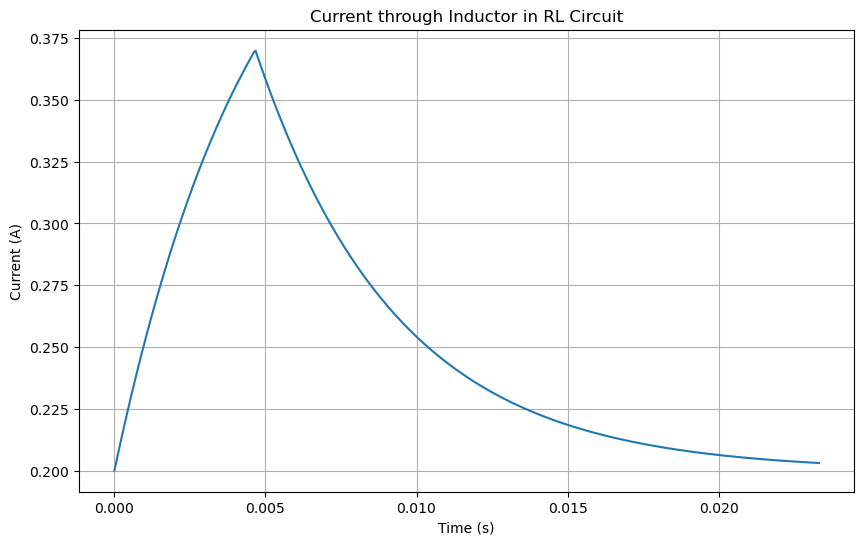

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, i_t)
#label='$i(t) = \\frac{V_s}{R} + (I_0 - \\frac{V_s}{R}) e^{-\\frac{R}{L}t}$')
plt.title('Current through Inductor in RL Circuit')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
#plt.legend()
plt.grid(True)
plt.show()